### Global Power Plant Database  
  
#### Project Description  
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.  
  
#### Key attributes of the database
The database includes the following indicators:
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]  
•	`country_long` (text): longer form of the country designation  
•	`name` (text): name or title of the power plant, generally in Romanized form  
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant  
•	`capacity_mw` (number): electrical generating capacity in megawatts  
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)  
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)  
•	`primary_fuel` (text): energy source used in primary electricity generation or export  
•	`other_fuel1` (text): energy source used in electricity generation or export  
•	`other_fuel2` (text): energy source used in electricity generation or export  
•	`other_fuel3` (text): energy source used in electricity generation or export  
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available  
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form  
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form  
•	`url` (text): web document corresponding to the `source` field  
•	`geolocation_source` (text): attribution for geolocation information  
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.  
•	`year_of_capacity_data` (number): year the capacity information was reported  
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013  
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014  
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015  
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016  
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017  
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018  
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019  
•	`generation_data_source` (text): attribution for the reported generation information  
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013  
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014   
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015   
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016   
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017   
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013  
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014   
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015  
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016  
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017   
   
#### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
  
#### Prediction :   Make two prediction  1) Primary Fuel   ,     2) capacity_mw 

#### Dataset Link-
•	https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv


In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### # Data Gathering

In [3]:
data1=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data2=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_ARG.csv')
data3=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_AUS.csv')
data4=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_BRA.csv')
data5=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_CAN.csv')
data6=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_CDMDB.csv')
data7=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_CHL.csv')
data8=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_EPRTR.csv')
data9=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_GEODB.csv')
data10=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_MEX.csv')
data11=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_URY.csv')
data12=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_MEX.csv')
data13=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_USA.csv')
data14=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_WRI.csv')
data15=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/finland_database.csv')
data16=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/yemen_database.csv')


In [4]:
data16.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,YEM,Yemen,Al Hali,YEM0000011,9.0,NaN,NaN,Oil,NaN,NaN,...,NaN,http://www.auptde.org/Article_Files/Manual%20O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YEM,Yemen,Al kornish,YEM0000014,2.0,NaN,NaN,Oil,NaN,NaN,...,NaN,http://www.auptde.org/Article_Files/Manual%20O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YEM,Yemen,Hizeaz ( 3 ),YEM0000004,10.0,NaN,NaN,Oil,NaN,NaN,...,NaN,http://www.auptde.org/Article_Files/Manual%20O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YEM,Yemen,Jear,YEM0000020,6.2,NaN,NaN,Oil,NaN,NaN,...,NaN,http://www.auptde.org/Article_Files/Manual%20O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YEM,Yemen,KHULF,YEM0000027,6.4,NaN,NaN,Oil,NaN,NaN,...,NaN,http://www.auptde.org/Article_Files/Manual%20O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### # Data Pre-processing

#### Observations:
'data6' is having fuel name as - 'fuel1', 'fuel2', 'fuel3', 'fuel4' where as we need as 'primary_fuel', 'other_fuel1', 
'other_fuel2','other_fuel3'  
Similarly with 'data8', 'data15' and 'data16' datasets as well


#### Changing the column names to desired one

In [5]:
data6=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_EPRTR.csv', names=['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw','latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2','other_fuel3','commissioning_year', 'owner', 'source', 'url', 'geolocation_source','year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','estimated_generation_gwh'], header=0)
data8=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_EPRTR.csv', names=['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw','latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2','other_fuel3','commissioning_year', 'owner', 'source', 'url', 'geolocation_source','year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','estimated_generation_gwh'], header=0)
data15=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/finland_database.csv', names=['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw','latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2','other_fuel3','commissioning_year', 'owner', 'source', 'url', 'geolocation_source','year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','estimated_generation_gwh'], header=0)
data16=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/yemen_database.csv', names=['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw','latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2','other_fuel3','commissioning_year', 'owner', 'source', 'url', 'geolocation_source','year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','estimated_generation_gwh'], header=0)

In [6]:
#checking for changes
data6.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'estimated_generation_gwh'],
      dtype='object')

#### Merging the data to single dataset

In [7]:
data=pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16], axis=0)

In [8]:
data.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
904,BRA,Brazil,Capitão Mor,BRA0030861,0.288,-22.7032,-44.4640,Hydro,NaN,NaN,...,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2502,BRA,Brazil,Lito Mendes,BRA0028926,0.050,-22.3313,-42.7501,Hydro,NaN,NaN,...,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,AUS,Australia,Tatiara Meats,AUS0000377,0.500,-36.3266,140.7368,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1319,NLD,Netherlands,E.On Benelux Generations NV (Maasvlakte),EPRTR0007143,NaN,51.9594,4.0204,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9346,USA,United States of America,Shady Oaks Wind Farm,USA0057964,109.500,41.6669,-89.0597,Wind,NaN,NaN,...,2019.0,317.133,339.87,342.654,323.948,365.531,326.647,345.818,U.S. Energy Information Administration,NaN


In [9]:
data.shape

(58276, 27)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58276 entries, 0 to 11
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   58276 non-null  object 
 1   country_long              58276 non-null  object 
 2   name                      58140 non-null  object 
 3   gppd_idnr                 58276 non-null  object 
 4   capacity_mw               53099 non-null  float64
 5   latitude                  51420 non-null  float64
 6   longitude                 51420 non-null  float64
 7   primary_fuel              51913 non-null  object 
 8   other_fuel1               2209 non-null   object 
 9   other_fuel2               443 non-null    object 
 10  other_fuel3               259 non-null    object 
 11  commissioning_year        21855 non-null  float64
 12  owner                     31343 non-null  object 
 13  source                    58125 non-null  object 
 14  url      

#### Observations:

1. 27 columns  &   58276 Rows
2. Object columns - 13
3. Float columns - 14
3. seem to have null values in the dataset

#### Checking null values, white spaces , '-' and 'NA' values

In [11]:
data.isnull().sum()

country                         0
country_long                    0
name                          136
gppd_idnr                       0
capacity_mw                  5177
latitude                     6856
longitude                    6856
primary_fuel                 6363
other_fuel1                 56067
other_fuel2                 57833
other_fuel3                 58017
commissioning_year          36421
owner                       26933
source                        151
url                           168
geolocation_source          12039
wepp_id                     58276
year_of_capacity_data       27577
generation_gwh_2013         51487
generation_gwh_2014         50740
generation_gwh_2015         49992
generation_gwh_2016         49280
generation_gwh_2017         48949
generation_gwh_2018         48450
generation_gwh_2019         48500
generation_data_source      46651
estimated_generation_gwh    58276
dtype: int64

In [12]:
data.isin([' ','NA','-']).sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
other_fuel3                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
wepp_id                     0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
generation_data_source      0
estimated_generation_gwh    0
dtype: int64

#### Obersvarion:
1. except for columns : 'country_long' and 'gppd_idnr' all other columns are having null values
2. No white spaces, ' - ' and 'NA' values in the dataset


#### #Dropping the columns 'country' as 'country_long' column is there,   
Also dropping columns ' wepp_id ' and ' estimated_generation_gwh ' as both the columns are having 58276 null values, ie all values in the colums are null only  
And also droping the columns ' name ' and ' gppd_idnr ' as both these columns only are identity for the power plant and not contributing to the dataset

In [13]:
data=data.drop(['country','wepp_id', 'estimated_generation_gwh', 'name', 'gppd_idnr' ], axis=1)

In [14]:
data.isnull().sum()

country_long                  0
capacity_mw                5177
latitude                   6856
longitude                  6856
primary_fuel               6363
other_fuel1               56067
other_fuel2               57833
other_fuel3               58017
commissioning_year        36421
owner                     26933
source                      151
url                         168
geolocation_source        12039
year_of_capacity_data     27577
generation_gwh_2013       51487
generation_gwh_2014       50740
generation_gwh_2015       49992
generation_gwh_2016       49280
generation_gwh_2017       48949
generation_gwh_2018       48450
generation_gwh_2019       48500
generation_data_source    46651
dtype: int64

#### We have to Predict 1). Primary Fuel and 2). capacity_mw , So these two columns are our Target columns

In [15]:
data['capacity_mw'].value_counts()

0.0       2106
5.0       1220
1.0       1114
2.0       1019
10.0       961
          ... 
278.6        1
650.8        1
2625.0       1
354.6        1
1004.0       1
Name: capacity_mw, Length: 7541, dtype: int64

In [16]:
data['primary_fuel'].value_counts()

Hydro             13451
Wind               8422
Solar              8257
Gas                7554
Oil                5598
Coal               3951
Biomass            1861
Waste              1766
Nuclear             402
Geothermal          310
Storage             143
Other               125
Cogeneration         46
Wave and Tidal       14
Petcoke              13
Name: primary_fuel, dtype: int64

#### Observation:
1. Our Target column 'capacity_mw' is having continious data - so our problem statement is related to Regression
2. Our Target column 'primary_fuel' is having categorical data - so our problem statement is related to Classification

#### So we need to create both Classification and Regression model

#### Our both the Target columns are having Null values so first we drop those Null values

In [17]:
data=data.dropna(subset=['capacity_mw', 'primary_fuel'])

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

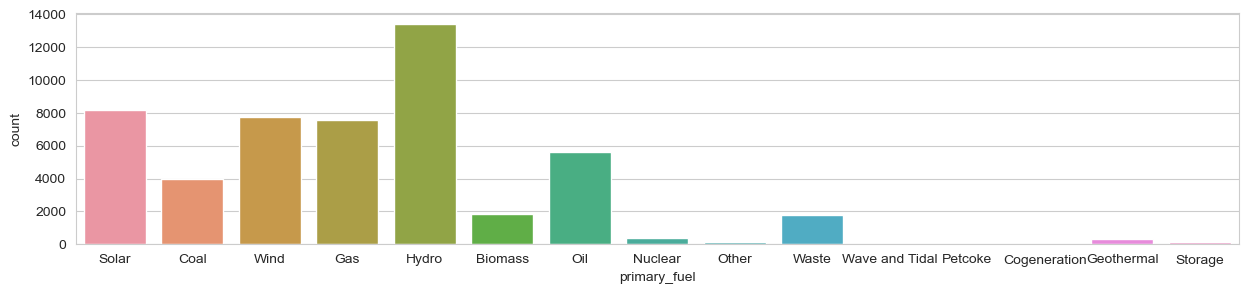

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,3))
sns.countplot(x="primary_fuel", data=data)

#### Observation:
1. Hydro power plants are maximum in dataset
2. followed by Solar Power plants
3. least are Petcoke powered power plants

In [19]:
data.isnull().sum()

country_long                  0
capacity_mw                   0
latitude                   6801
longitude                  6801
primary_fuel                  0
other_fuel1               48859
other_fuel2               50624
other_fuel3               50808
commissioning_year        29235
owner                     25290
source                      151
url                         168
geolocation_source         7695
year_of_capacity_data     23194
generation_gwh_2013       44594
generation_gwh_2014       43810
generation_gwh_2015       43034
generation_gwh_2016       42276
generation_gwh_2017       41966
generation_gwh_2018       41389
generation_gwh_2019       41402
generation_data_source    39783
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51067 entries, 0 to 11
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            51067 non-null  object 
 1   capacity_mw             51067 non-null  float64
 2   latitude                44266 non-null  float64
 3   longitude               44266 non-null  float64
 4   primary_fuel            51067 non-null  object 
 5   other_fuel1             2208 non-null   object 
 6   other_fuel2             443 non-null    object 
 7   other_fuel3             259 non-null    object 
 8   commissioning_year      21832 non-null  float64
 9   owner                   25777 non-null  object 
 10  source                  50916 non-null  object 
 11  url                     50899 non-null  object 
 12  geolocation_source      43372 non-null  object 
 13  year_of_capacity_data   27873 non-null  float64
 14  generation_gwh_2013     6473 non-null   f

#### Looking out for the columns ' owner ', ' source ' and ' url ' , these columns are only providing information about the powerplant and not contributing any thing to the capacity of the power plant
#### Also the columns ' geolocation_source ' and ' generation_data_source ' are providing the information about the source from where the geolocation information and generation data is taken

In [21]:
data['owner'].value_counts()

Comisión Federal de Electricidad    206
Cypress Creek Renewables            185
CFE                                 132
Fortum                              130
Lightsource Renewable Energy        121
                                   ... 
Red Dirt Wind Project  LLC            1
Choctaw Generation L.P  L.L.L.P.      1
Red Horse 2                           1
Red Horse III                         1
Stora Enso Oyj Enocellin tehdas       1
Name: owner, Length: 11517, dtype: int64

In [22]:
data['source'].value_counts()

U.S. Energy Information Administration                       9804
GEODB                                                        9221
Agência Nacional de Energia Elétrica (Brazil)                4666
UK Renewable Energy Planning Database                        2611
Open Power System Data                                       2474
                                                             ... 
New Energy                                                      1
Guangdong Provincial Electric Power Survey                      1
Hitachi                                                         1
Irtysh River Basin Development and Construction Authority       1
Solarpark Ramin GmbH & Co KG                                    1
Name: source, Length: 899, dtype: int64

In [23]:
data['url'].value_counts()

http://www.eia.gov/electricity/data/browser/                                                                                      9804
http://globalenergyobservatory.org                                                                                                9201
http://www2.aneel.gov.br/aplicacoes/capacidadebrasil/capacidadebrasil.cfm                                                         4666
https://www.gov.uk/government/collections/renewable-energy-planning-data                                                          2611
http://data.open-power-system-data.org/renewable_power_plants/2016-10-21/                                                         1908
                                                                                                                                  ... 
http://cdm.unfccc.int/filestorage/h/d/157OKZRWJY64N0FXQICG8T2VBP9H3M.pdf/8644%20PDD.pdf?t=eTB8b2o5eHFnfDAgIsY2E5rdje19Jqq-1RzS       1
http://baike.baidu.com/view/439118.htm                 

In [24]:
data['geolocation_source'].value_counts()

GEODB                                                                                  10731
U.S. Energy Information Administration                                                  9804
Agência Nacional de Energia Elétrica (Brazil)                                           3895
WRI                                                                                     3207
UK Renewable Energy Planning Database                                                   2610
Open Power System Data                                                                  2438
UNFCCC CDM Registry                                                                     1598
Industry About                                                                          1453
CARMA                                                                                   1316
Natural Resources Canada                                                                1125
GCPT                                                                  

In [25]:
data['generation_data_source'].value_counts()

U.S. Energy Information Administration                                       9727
Central Electricity Authority                                                 449
ENTSOE                                                                        321
Australia Clean Energy Regulator                                              286
Open Development Vietnam                                                      165
Guatemala Energy Data Visualization Center at Universidad Rafael Landivar      73
Peru Ministry of Energy and Mines                                              64
Venezuela Electricity Sector                                                   46
Agencia de Regulacion y Control de Electricidad                                43
Egyptian Electricity Holding Company                                           39
Open Development Myanmar                                                       30
Wind Stats Netherlands                                                         17
Volta River Auth

#### Dropping these Five columns as well

In [26]:
data=data.drop(['source','url', 'owner', 'geolocation_source', 'generation_data_source'], axis=1)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51067 entries, 0 to 11
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_long           51067 non-null  object 
 1   capacity_mw            51067 non-null  float64
 2   latitude               44266 non-null  float64
 3   longitude              44266 non-null  float64
 4   primary_fuel           51067 non-null  object 
 5   other_fuel1            2208 non-null   object 
 6   other_fuel2            443 non-null    object 
 7   other_fuel3            259 non-null    object 
 8   commissioning_year     21832 non-null  float64
 9   year_of_capacity_data  27873 non-null  float64
 10  generation_gwh_2013    6473 non-null   float64
 11  generation_gwh_2014    7257 non-null   float64
 12  generation_gwh_2015    8033 non-null   float64
 13  generation_gwh_2016    8791 non-null   float64
 14  generation_gwh_2017    9101 non-null   float64
 15  gener

#### Also the columns other fuel are containing very less data:
1. 'other_fuel1' ---- 2208   -----   4 %  
2. 'other_fuel2' ---- 443   -----   0.8 %
3. 'other_fuel3' ---- 259   -----   0.4 %  

#### hence dropping these three columns as well



In [28]:
data=data.drop(['other_fuel1','other_fuel2', 'other_fuel3'], axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51067 entries, 0 to 11
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_long           51067 non-null  object 
 1   capacity_mw            51067 non-null  float64
 2   latitude               44266 non-null  float64
 3   longitude              44266 non-null  float64
 4   primary_fuel           51067 non-null  object 
 5   commissioning_year     21832 non-null  float64
 6   year_of_capacity_data  27873 non-null  float64
 7   generation_gwh_2013    6473 non-null   float64
 8   generation_gwh_2014    7257 non-null   float64
 9   generation_gwh_2015    8033 non-null   float64
 10  generation_gwh_2016    8791 non-null   float64
 11  generation_gwh_2017    9101 non-null   float64
 12  generation_gwh_2018    9678 non-null   float64
 13  generation_gwh_2019    9665 non-null   float64
dtypes: float64(12), object(2)
memory usage: 5.8+ MB


### Working on the Null values

In [30]:
data.isnull().sum()

country_long                 0
capacity_mw                  0
latitude                  6801
longitude                 6801
primary_fuel                 0
commissioning_year       29235
year_of_capacity_data    23194
generation_gwh_2013      44594
generation_gwh_2014      43810
generation_gwh_2015      43034
generation_gwh_2016      42276
generation_gwh_2017      41966
generation_gwh_2018      41389
generation_gwh_2019      41402
dtype: int64

#### treating null values for columns 'latitude' and 'longitude' we use mean so that the distrubution of data is not effected

In [31]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,51067.000000,44266.000000,44266.000000,21832.000000,27873.000000,6473.000000,7257.000000,8033.000000,8791.000000,9101.000000,9678.000000,9665.000000
mean,192.679932,30.610685,-22.010282,1997.276986,2017.629713,590.400937,654.439334,652.710386,584.515748,533.356549,519.644359,423.659840
std,534.779325,24.813707,76.566139,23.680734,1.356979,2166.231373,2227.060116,2273.974004,2104.782705,2006.513678,1980.059938,1698.011827
min,0.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000
25%,4.000000,25.982100,-83.455400,1989.000000,2017.000000,1.947000,2.205850,2.452000,2.413500,2.171000,2.220556,2.739000
50%,20.000000,39.385900,-45.545800,2007.000000,2017.000000,23.679000,23.422000,23.104000,17.949000,13.731000,12.486500,11.511000
75%,102.000000,45.583700,17.107750,2013.000000,2019.000000,200.950996,225.068126,240.617000,187.457500,161.449000,151.318000,122.691000
max,22500.000000,166.019700,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,59546.865000,32377.477000,35116.000000,35136.000000,31920.368000


In [32]:
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())
data['longitude'] = data['longitude'].fillna(data['longitude'].mean())

In [33]:
data.isnull().sum()

country_long                 0
capacity_mw                  0
latitude                     0
longitude                    0
primary_fuel                 0
commissioning_year       29235
year_of_capacity_data    23194
generation_gwh_2013      44594
generation_gwh_2014      43810
generation_gwh_2015      43034
generation_gwh_2016      42276
generation_gwh_2017      41966
generation_gwh_2018      41389
generation_gwh_2019      41402
dtype: int64

#### treating null values for columns 'commissioning_year' and 'year_of_capacity_data' we use mode as these two columns are only showing Operations start year for the plant and year of the capacity documentation

In [34]:
data['commissioning_year'].mode()

0    2015.0
Name: commissioning_year, dtype: float64

In [35]:
data['year_of_capacity_data'].mode()

0    2017.0
Name: year_of_capacity_data, dtype: float64

In [36]:

data['commissioning_year'].fillna(2015.0, inplace=True)
data['year_of_capacity_data'].fillna(2017.0, inplace=True)

In [37]:
data['year_of_capacity_data']

0     2017.0
1     2017.0
2     2017.0
3     2019.0
4     2019.0
       ...  
7     2017.0
8     2017.0
9     2017.0
10    2017.0
11    2017.0
Name: year_of_capacity_data, Length: 51067, dtype: float64

In [38]:
data.isnull().sum()

country_long                 0
capacity_mw                  0
latitude                     0
longitude                    0
primary_fuel                 0
commissioning_year           0
year_of_capacity_data        0
generation_gwh_2013      44594
generation_gwh_2014      43810
generation_gwh_2015      43034
generation_gwh_2016      42276
generation_gwh_2017      41966
generation_gwh_2018      41389
generation_gwh_2019      41402
dtype: int64

#### Now as the remaining columns are showing power generated in the respective years, so to fill the NaN values we choose to do the same with 'Mean' of the column to mantain the data distribution

In [39]:
data['generation_gwh_2013'] = data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean())
data['generation_gwh_2014'] = data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015'] = data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016'] = data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017'] = data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_gwh_2018'] = data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())
data['generation_gwh_2019'] = data['generation_gwh_2019'].fillna(data['generation_gwh_2019'].mean())

In [40]:
data.isnull().sum()

country_long             0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
generation_gwh_2019      0
dtype: int64

In [41]:
data.shape

(51067, 14)

#### Now all the Nan Values are treated and having NO Null values in dataset

#### # Encoding the Object column data

In [42]:
lab=LabelEncoder()

In [43]:
df=lab.fit_transform(data['country_long'])
pd.Series(df)
data['country_long']=df

In [44]:
df=lab.fit_transform(data['primary_fuel'])
pd.Series(df)
data['primary_fuel']=df

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51067 entries, 0 to 11
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_long           51067 non-null  int32  
 1   capacity_mw            51067 non-null  float64
 2   latitude               51067 non-null  float64
 3   longitude              51067 non-null  float64
 4   primary_fuel           51067 non-null  int32  
 5   commissioning_year     51067 non-null  float64
 6   year_of_capacity_data  51067 non-null  float64
 7   generation_gwh_2013    51067 non-null  float64
 8   generation_gwh_2014    51067 non-null  float64
 9   generation_gwh_2015    51067 non-null  float64
 10  generation_gwh_2016    51067 non-null  float64
 11  generation_gwh_2017    51067 non-null  float64
 12  generation_gwh_2018    51067 non-null  float64
 13  generation_gwh_2019    51067 non-null  float64
dtypes: float64(12), int32(2)
memory usage: 5.5 MB


#### Converting int data type to float

In [46]:
data['country_long']=data['country_long'].astype(float)
data['primary_fuel']=data['primary_fuel'].astype(float)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51067 entries, 0 to 11
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_long           51067 non-null  float64
 1   capacity_mw            51067 non-null  float64
 2   latitude               51067 non-null  float64
 3   longitude              51067 non-null  float64
 4   primary_fuel           51067 non-null  float64
 5   commissioning_year     51067 non-null  float64
 6   year_of_capacity_data  51067 non-null  float64
 7   generation_gwh_2013    51067 non-null  float64
 8   generation_gwh_2014    51067 non-null  float64
 9   generation_gwh_2015    51067 non-null  float64
 10  generation_gwh_2016    51067 non-null  float64
 11  generation_gwh_2017    51067 non-null  float64
 12  generation_gwh_2018    51067 non-null  float64
 13  generation_gwh_2019    51067 non-null  float64
dtypes: float64(14)
memory usage: 5.8 MB


#### Observation:
Now all the columns are having data type as 'float64' and all the Null values are now replaced

### # EDA

#### Basic Stats for the data set

In [48]:
data.describe()

,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,51067.000000,51067.000000,51067.000000,51067.000000,51067.00000,51067.000000,51067.000000,51067.000000,51067.000000,51067.000000,51067.000000,51067.000000,51067.000000,51067.000000
mean,98.838976,192.679932,30.610685,-22.010282,6.86690,2007.423114,2017.343705,590.400937,654.439334,652.710386,584.515748,533.356549,519.644359,423.659840
std,57.700146,534.779325,23.102339,71.285477,4.22495,17.793620,1.050401,771.184292,839.488318,901.844010,873.244348,847.026310,861.951415,738.674745
min,0.000000,0.000000,-77.847000,-179.977700,0.00000,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000
25%,30.000000,4.000000,30.199850,-79.696950,3.00000,2009.000000,2017.000000,590.400937,654.439334,652.710386,584.515748,533.356549,519.644359,423.659840
50%,114.000000,20.000000,36.446900,-22.010282,5.00000,2015.000000,2017.000000,590.400937,654.439334,652.710386,584.515748,533.356549,519.644359,423.659840
75%,159.000000,102.000000,44.491150,10.554350,10.00000,2015.000000,2017.000000,590.400937,654.439334,652.710386,584.515748,533.356549,519.644359,423.659840
max,167.000000,22500.000000,166.019700,179.388700,14.00000,2020.000000,2019.000000,50834.000000,32320.917000,59546.865000,32377.477000,35116.000000,35136.000000,31920.368000


#### Observation:
1. The column 'capacity_mw' is having min value of 0.00 and max of 22500, the data is not distributed around mean as mean and 50% are not close, also there is lot of difference between 75% and Max value so must be having outliers
2. The column 'primary_fuel' is having min value of 0.00 and max of 14, the dat seems to be distributed around mean as mean and 50% are close to each other
3. The column 'commissioning_year' is having min value of 1896 and max of 2020, means first Power Plant was commissioned in year 1986 and last as per data is in 2020
4. The column 'year_of_capacity_data' is having min value of 2000 and max of 2019, means the first data was recorded in year 2000 and then up to 2019 as per data
5. The generation_gwh columns are having min value in Negative, that may be wrongly put by mistake as generation can not be in negative, if the plant is kept off still it will be having 0.00 values but not negative

#### Plotting the count plot for Both the Target column ' primary_fuel '

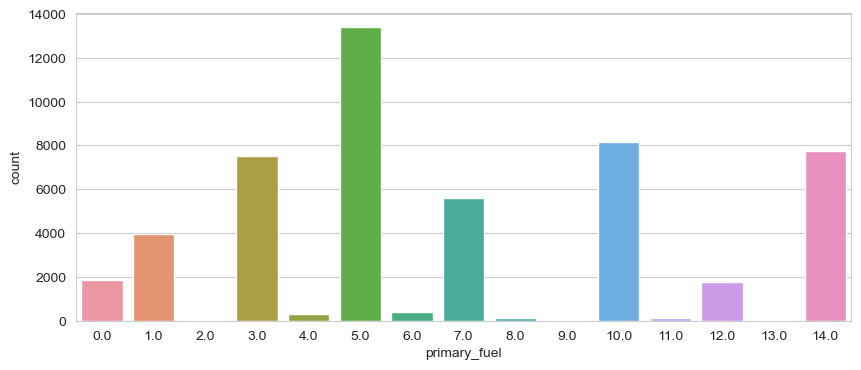

In [49]:
plt.figure(figsize=(10,4))
sns.countplot(data['primary_fuel'])
plt.show()

In [50]:
data['capacity_mw'].value_counts()

5.0       1220
1.0       1114
2.0       1019
10.0       961
30.0       673
          ... 
278.6        1
650.8        1
2625.0       1
354.6        1
1004.0       1
Name: capacity_mw, Length: 7541, dtype: int64

#### Distribution plot for Target column 'capacity_mw'

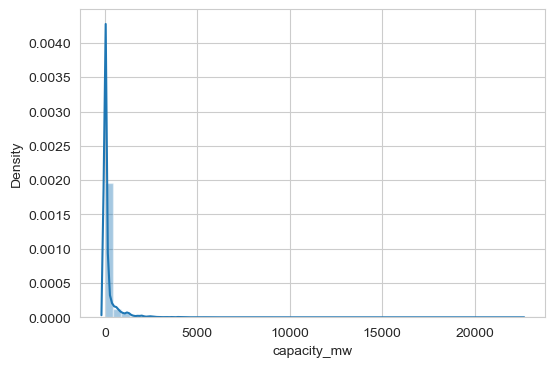

In [51]:
plt.figure(figsize=(6,4))
sns.distplot(data['capacity_mw'])
plt.show()

#### Distribution is not proper around mean and skewed towards left

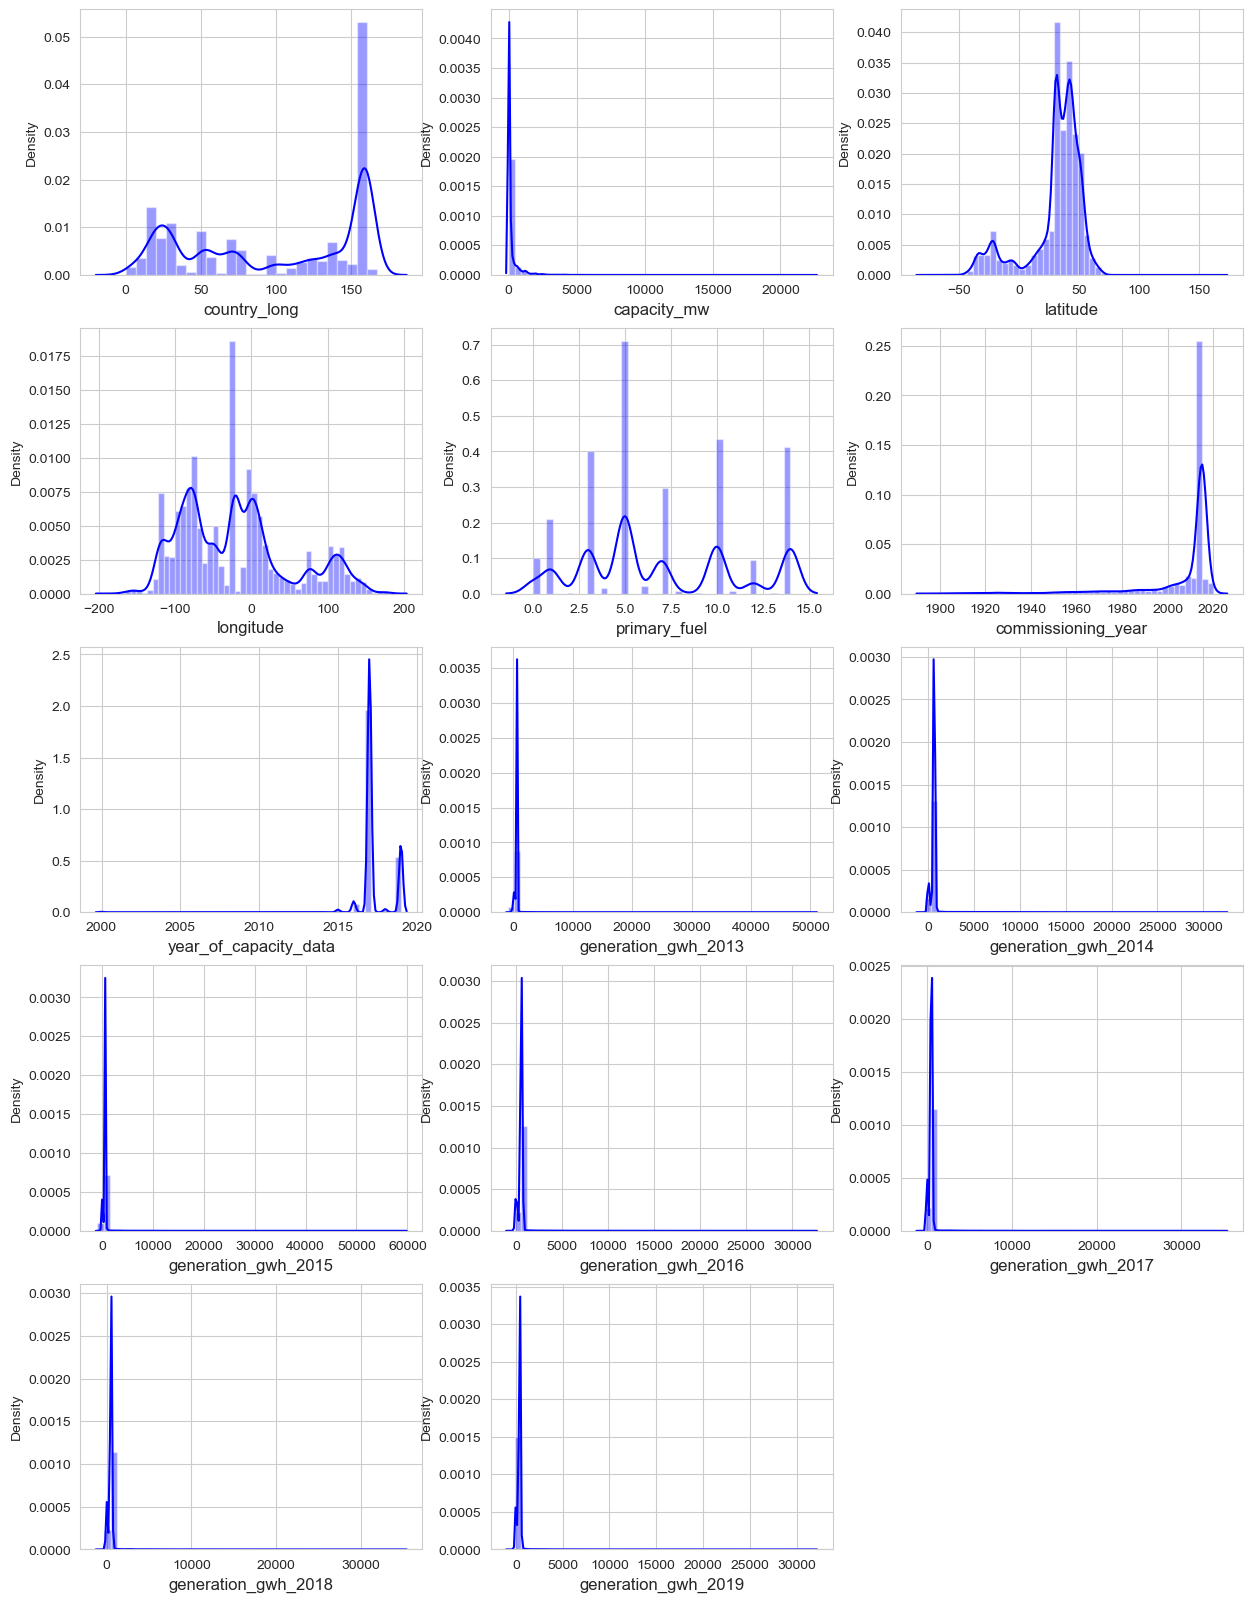

In [52]:
plt.figure(figsize=(15,20))
pltno=1
for column in data:
    if pltno<=14:
        plt.subplot(5,3,pltno)
        sns.distplot(data[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### # Observations:
1. the data for the columns generation_gwh seems to be skewed towards left
2. the data for the columns 'year_of_capicity_data' and 'commissioning_year' seems to be skewed towards Right
3. the data for the column 'capacity_mw' seems to be skewed towards left
4. the data for the columns 'latitude', 'longitude', 'country_long' and 'primary_fuel' seems to be normally distributed

#### # Box plot

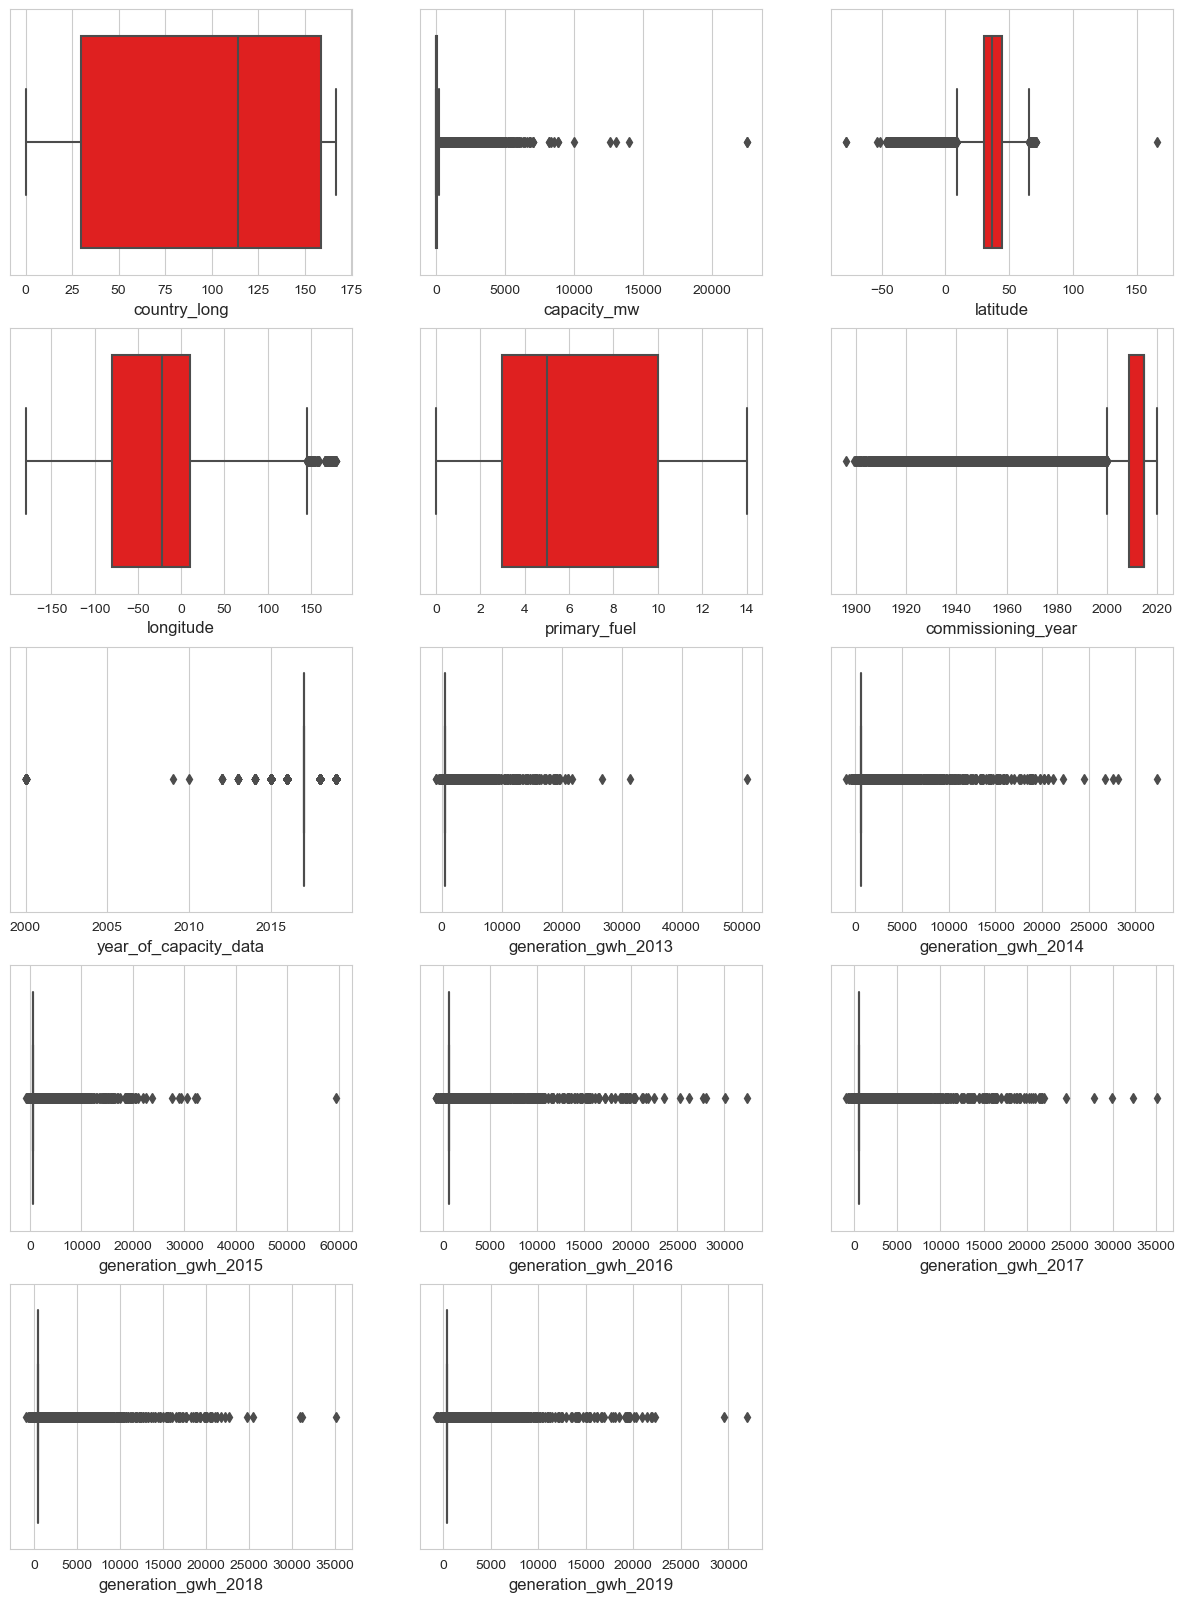

In [53]:
plt.figure(figsize=(15,20))
pltno=1
for column in data:
    if pltno<=14:
        plt.subplot(5,3,pltno)
        sns.boxplot(data[column], color='r')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Observation:
Outliers seen in all the columns except for the columns ' primary_fuel ' and ' country_long '

#### # Checing skewness

In [54]:
data.skew()

country_long             -0.238863
capacity_mw               8.337285
latitude                 -1.517909
longitude                 0.635544
primary_fuel              0.359316
commissioning_year       -3.070756
year_of_capacity_data    -4.559862
generation_gwh_2013      20.506627
generation_gwh_2014      15.686986
generation_gwh_2015      19.565331
generation_gwh_2016      15.811321
generation_gwh_2017      16.586242
generation_gwh_2018      16.263706
generation_gwh_2019      17.474837
dtype: float64

#### Z-Score method to remove skewness

In [55]:
# Z score method 
from scipy import stats

data1=data

comp=pd.DataFrame()
z = abs(stats.zscore(data1))


data1 = data1[(z < 3).all(axis=1)]

comp['new'] = data1.skew()
comp['old'] = data.skew()
print(data1.shape)
comp


(47525, 14)


,new,old
country_long,-0.220572,-0.238863
capacity_mw,3.201878,8.337285
latitude,-1.488174,-1.517909
longitude,0.628246,0.635544
primary_fuel,0.278759,0.359316
commissioning_year,-2.696551,-3.070756
year_of_capacity_data,1.106484,-4.559862
generation_gwh_2013,-0.366060,20.506627
generation_gwh_2014,-0.398082,15.686986
generation_gwh_2015,-0.177323,19.565331


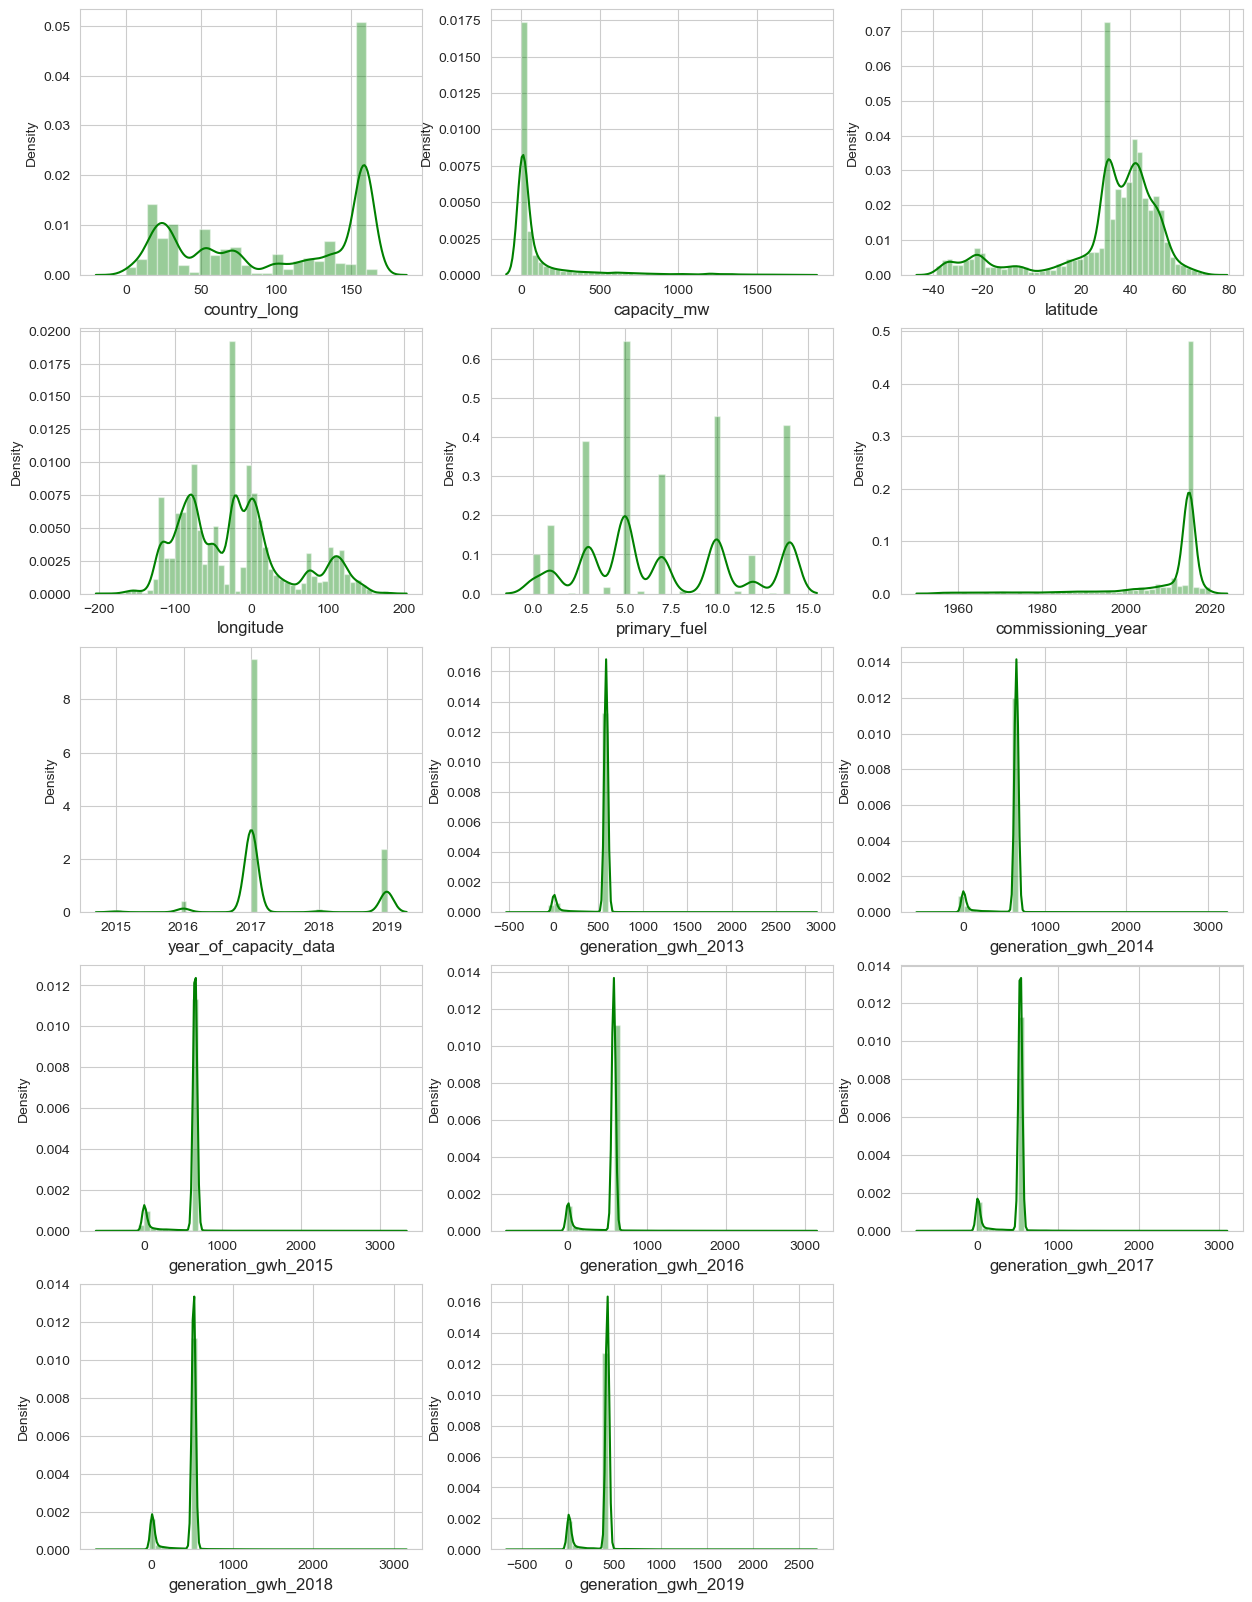

In [56]:
plt.figure(figsize=(15,20))
pltno=1
for column in data1:
    if pltno<=14:
        plt.subplot(5,3,pltno)
        sns.distplot(data1[column], color='g')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### # dist plot looking good now, so we assign these values to our main data set

In [57]:
data=data1

#### Replotting Box plot

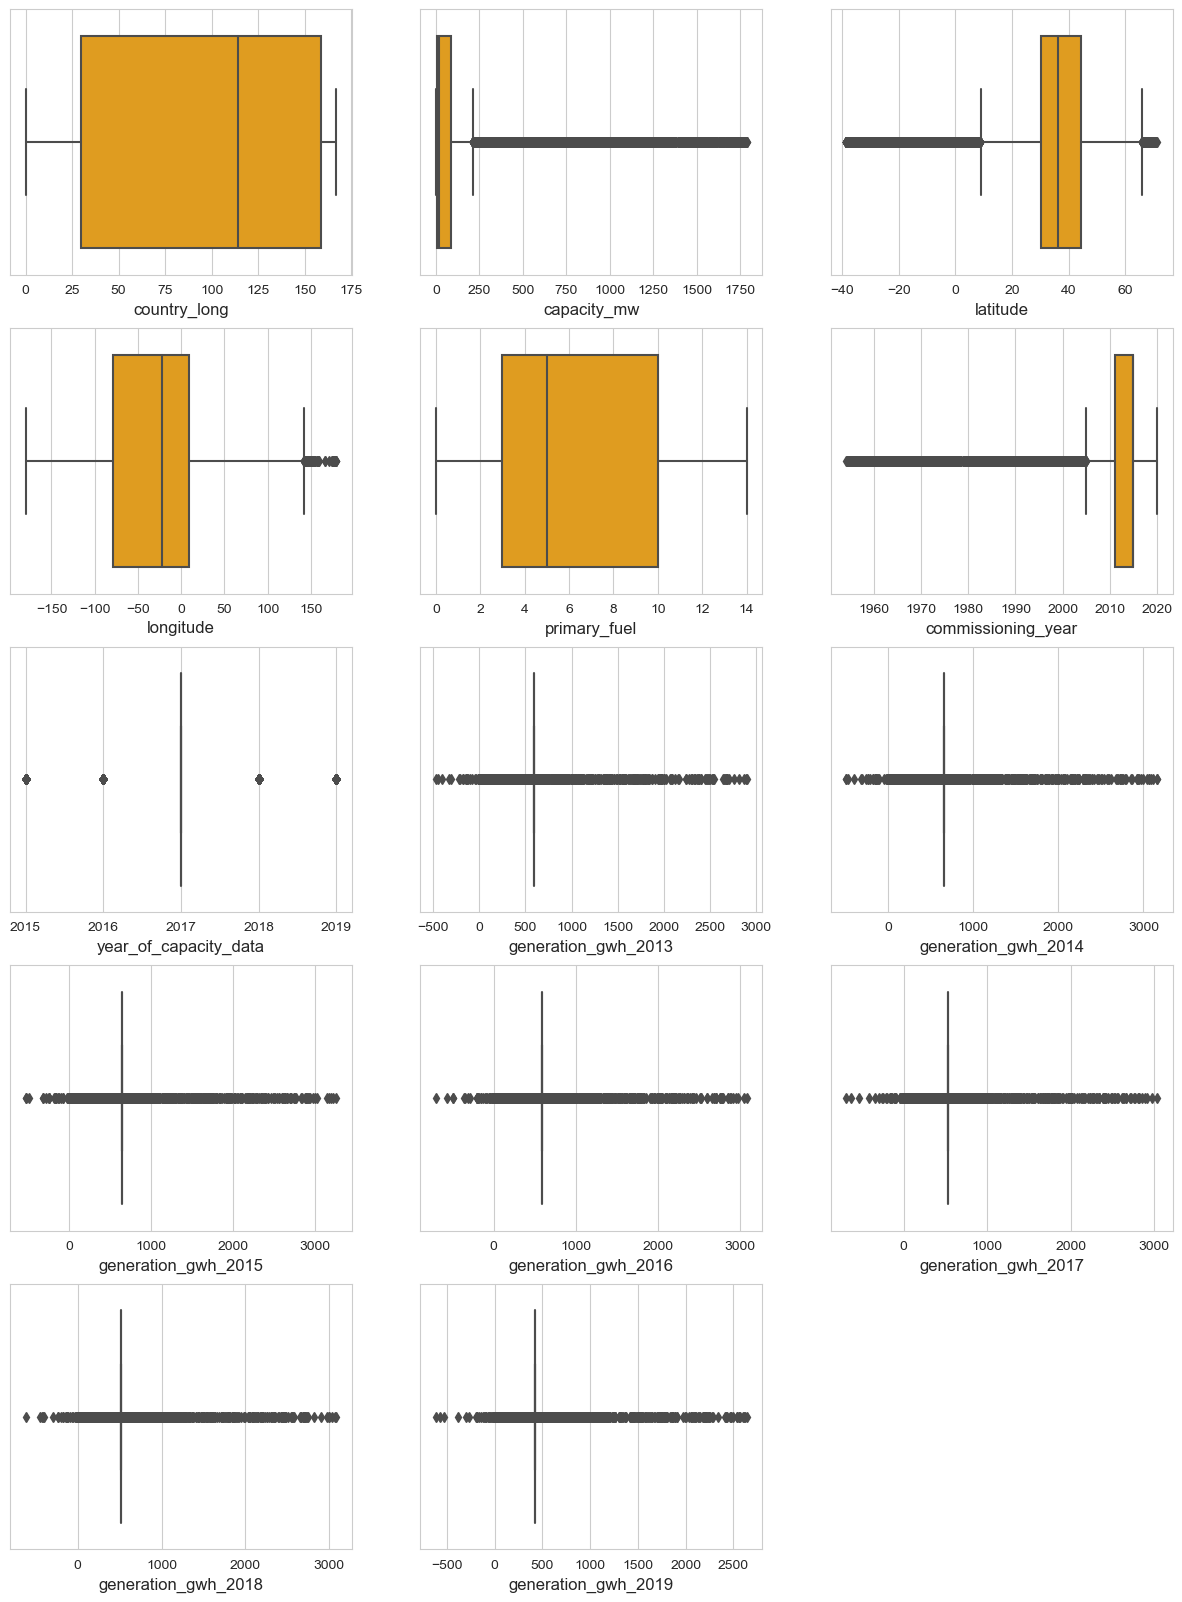

In [58]:
plt.figure(figsize=(15,20))
pltno=1
for column in data:
    if pltno<=14:
        plt.subplot(5,3,pltno)
        sns.boxplot(data[column], color='orange')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

### # Multi-corelation heatmap

In [59]:
data.corr()

,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
country_long,1.000000,-0.033789,0.379393,-0.389855,0.113513,-0.065256,0.498566,-0.256688,-0.282062,-0.292870,-0.314325,-0.327735,-0.332819,-0.333862
capacity_mw,-0.033789,1.000000,0.024512,0.208513,-0.336326,-0.038816,-0.091461,0.110731,0.118683,0.133097,0.146369,0.147980,0.167758,0.179289
latitude,0.379393,0.024512,1.000000,-0.074194,0.101030,-0.007948,0.163188,-0.082955,-0.087353,-0.085639,-0.086973,-0.103204,-0.105815,-0.125711
longitude,-0.389855,0.208513,-0.074194,1.000000,-0.057059,0.084591,-0.390233,0.253502,0.277383,0.283778,0.293500,0.317767,0.322921,0.319187
primary_fuel,0.113513,-0.336326,0.101030,-0.057059,1.000000,0.182727,0.122642,-0.034361,-0.046407,-0.060915,-0.080976,-0.096536,-0.113874,-0.125822
commissioning_year,-0.065256,-0.038816,-0.007948,0.084591,0.182727,1.000000,-0.248590,0.285549,0.282650,0.261809,0.221295,0.194180,0.161227,0.100159
year_of_capacity_data,0.498566,-0.091461,0.163188,-0.390233,0.122642,-0.248590,1.000000,-0.501167,-0.543118,-0.565702,-0.592245,-0.620989,-0.625777,-0.623816
generation_gwh_2013,-0.256688,0.110731,-0.082955,0.253502,-0.034361,0.285549,-0.501167,1.000000,0.866331,0.799336,0.738989,0.705934,0.675265,0.641382
generation_gwh_2014,-0.282062,0.118683,-0.087353,0.277383,-0.046407,0.282650,-0.543118,0.866331,1.000000,0.876056,0.806662,0.780341,0.741807,0.625133
generation_gwh_2015,-0.292870,0.133097,-0.085639,0.283778,-0.060915,0.261809,-0.565702,0.799336,0.876056,1.000000,0.833355,0.795361,0.751563,0.641040


#### Plotting heat map

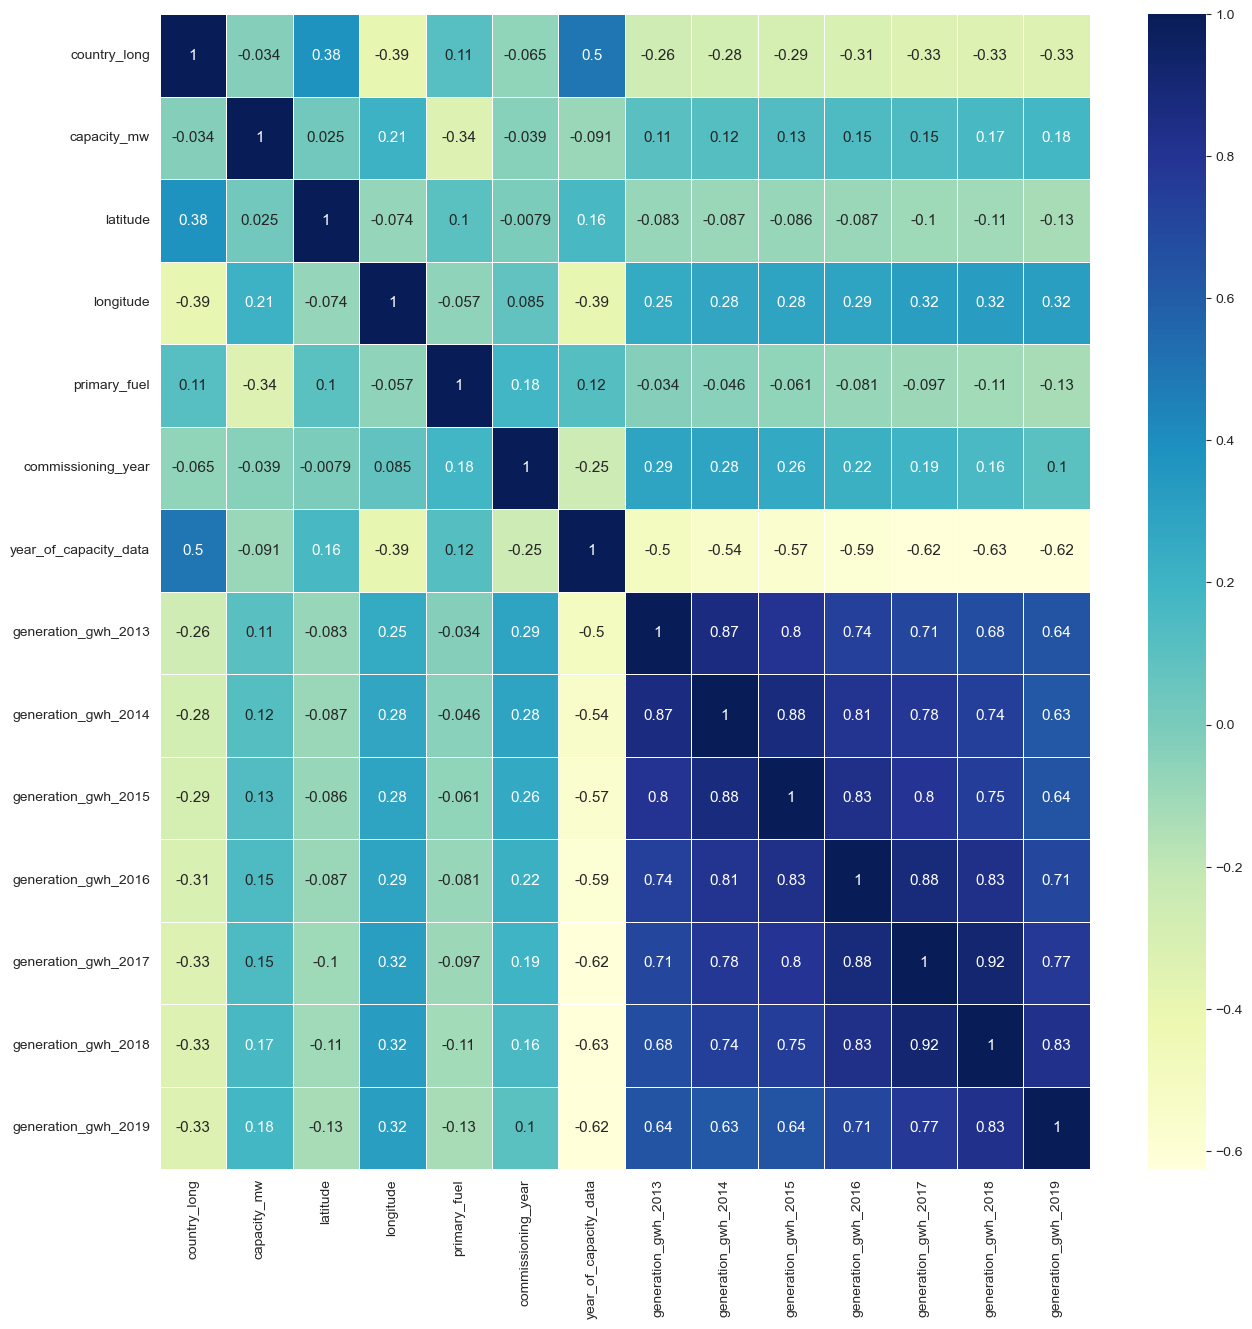

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5, annot_kws={"size":11})
plt.show()

#### # Observation:
1. column 'generation_gwh_2014' is 87% corelated to column 'generation_gwh_2013'
2. column 'generation_gwh_2015' is 88% corelated to column 'generation_gwh_2014'
3. column 'generation_gwh_2016' is 83% corelated to column 'generation_gwh_2015'
4. column 'generation_gwh_2017' is 88% corelated to column 'generation_gwh_2016'
5. column 'generation_gwh_2018' is 92% corelated to column 'generation_gwh_2017'
6. column 'generation_gwh_2019' is 93% corelated to column 'generation_gwh_2018'
7. also all these columns are inter corelated with more than 60%

#### Hence dropping all these columns except column 'generation_gwh_2018' as this column is having max enties of data compare to other columns and also having max co-linearity with both the target columns


In [61]:
data.drop(['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2019'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47525 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_long           47525 non-null  float64
 1   capacity_mw            47525 non-null  float64
 2   latitude               47525 non-null  float64
 3   longitude              47525 non-null  float64
 4   primary_fuel           47525 non-null  float64
 5   commissioning_year     47525 non-null  float64
 6   year_of_capacity_data  47525 non-null  float64
 7   generation_gwh_2018    47525 non-null  float64
dtypes: float64(8)
memory usage: 3.3 MB


#### #replotting multi co-relation heatmap

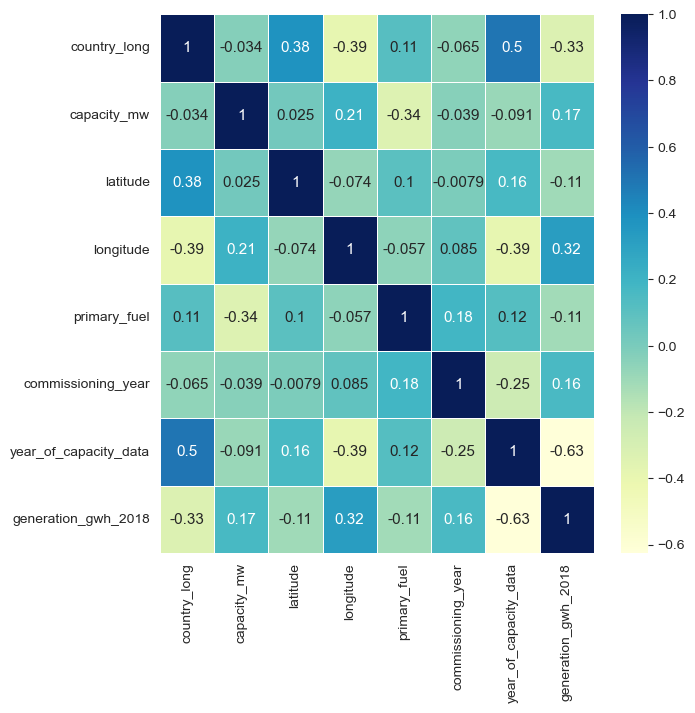

In [62]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5, annot_kws={"size":11})
plt.show()

#### Now the there is NO multi-colinearity in the data

#### # Checking for the Imbalance in data

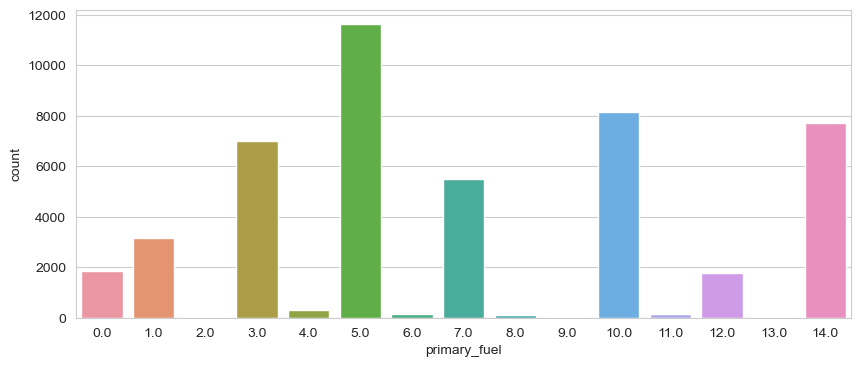

In [63]:
plt.figure(figsize=(10,4))
sns.countplot(data['primary_fuel'])
plt.show()

#### Clearly having imbalance in the data 

#### # Using Oversampling Method for balancing the data

In [64]:
from imblearn.over_sampling import SMOTE
X=data.drop(['primary_fuel'], axis=1)
y=data['primary_fuel']

sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [65]:
y1.value_counts()

10.0    11621
1.0     11621
14.0    11621
3.0     11621
5.0     11621
0.0     11621
7.0     11621
6.0     11621
8.0     11621
12.0    11621
13.0    11621
9.0     11621
2.0     11621
4.0     11621
11.0    11621
Name: primary_fuel, dtype: int64

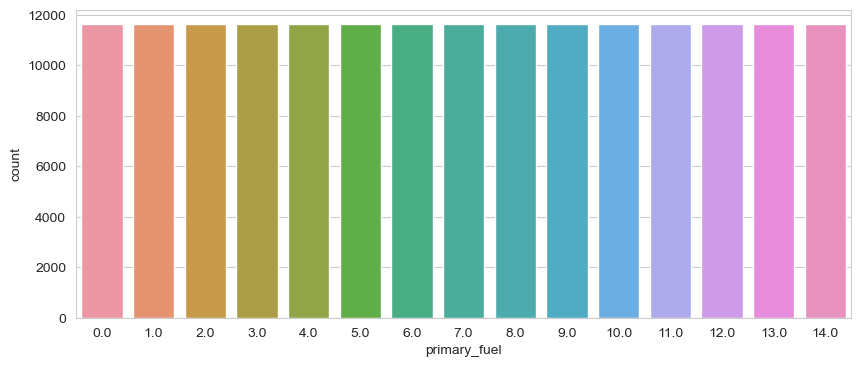

In [66]:
plt.figure(figsize=(10,4))
sns.countplot(y1)
plt.show()

#### Now we are having equal samples for data

### # Model buliding

### First taking 'primary_fuel' as target column

In [67]:
# Importing all other libraries for modeling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

#### # Splitting label and features

In [68]:
X=x1
y=y1
X.head()

,country_long,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2018
0,69.0,2.5,28.1839,73.2407,2011.0,2017.0,519.644359
1,69.0,98.0,24.7663,74.6090,2015.0,2017.0,519.644359
2,69.0,39.2,21.9038,69.3732,2015.0,2017.0,519.644359
3,69.0,135.0,23.8712,91.3602,2004.0,2019.0,626.239128
4,69.0,250.0,23.7689,68.6447,2005.0,2019.0,976.655000


In [70]:
y.head()

0    10.0
1     1.0
2    14.0
3     3.0
4     1.0
Name: primary_fuel, dtype: float64

#### # Test train split

In [726]:
# Random Forest Classifier
rs=0
max_acc=0
for i in range(10):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    print('working at random state : ', i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy > max_acc:
        max_acc=accuracy
        rs=i
print("Max accuracy score : ", max_acc, "   , at Random state : ", rs)

working at random state :  0
working at random state :  1
working at random state :  2
working at random state :  3
working at random state :  4
working at random state :  5
working at random state :  6
working at random state :  7
working at random state :  8
working at random state :  9
Max accuracy score :  0.9008696849399941    , at Random state :  3


In [71]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=rs)
x_test

,country_long,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2018
167166,142.758743,190.653825,40.849191,90.400456,2015.000000,2017.0,519.644359
50551,19.000000,170.034380,-20.619525,-49.997886,2007.986427,2017.0,519.644359
1597,19.000000,0.216000,2.824000,-60.663500,1987.000000,2017.0,519.644359
129030,159.000000,84.630421,39.906946,-89.852409,1983.248141,2019.0,0.000000
151029,158.000000,3.000000,53.411702,-2.493020,2015.000000,2017.0,519.644359
...,...,...,...,...,...,...,...
114658,159.000000,132.412830,33.207010,-92.170336,1976.943646,2019.0,353.906281
149481,153.000000,6.000000,30.610685,-22.010282,2015.000000,2017.0,519.644359
67831,158.000000,18.057388,37.346279,-15.108361,2015.000000,2017.0,519.644359
171122,158.000000,15.798996,54.894870,-2.895003,2015.000000,2017.0,519.644359


In [80]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfc_y_pred=rf.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,rfc_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,rfc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,rfc_y_pred))

accuracy_score : 0.8998600243236421

 confusion_matrix  : 
 [[2554    5    4   25   10   73    0   56   36    2   60   20   81   11
    74]
 [  13 2580    1  121    9   65   48   18    5    4    5    0   40    1
     6]
 [   1    0 2881    0    0    0    2    1    0    0   11    1    0    0
     4]
 [  51  189   18 2060   25  106   34  181   19   10   53   12  129    2
    62]
 [   5    3    2   15 2789    5    2   11    6    0   18    0    2    0
    11]
 [  94  108    5  112   25 2102   15  124   31    6   55    0   79    2
    85]
 [   0    4    0    7    0    0 2911    0    1    0    0    0    0    0
     0]
 [  71   43    4  163   12  113   10 2394    7    3   24    1   38    1
    26]
 [  21    0    0   22    5    4    1    5 2763    2    2    0   31    0
    60]
 [   0    0    1    0    0    0    0    0    0 2897    0    0    0    0
     0]
 [  58    9   17   18   10   29    0   19    5    0 2549   36   40    1
    69]
 [   5    0    3    0    0    0    0    0    1    0   12 285

In [73]:
#Support Vector Classifier
svc=SVC()
svc.fit(x_train, y_train)
svc_y_pred=svc.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,svc_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,svc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,svc_y_pred))

accuracy_score : 0.36675921888983226

 confusion_matrix  : 
 [[ 809   11   64   19   41   11    0  811  292   53   93  112   58  451
   186]
 [  14 1280   65  214  100   23  545   25   93   41   26    2  184   81
   223]
 [  17    8  752   19   12    0   95    0   26  703    2  620  126  516
     5]
 [ 110  497  143  391  106   46  370   88  186  275   17  142  357  117
   106]
 [ 106   91  475   99  359    4   34  154  553   30  145   85  307  161
   266]
 [ 442  241   34  108  144   42  106  301  326  135   83   28  324  288
   241]
 [   0  588    0   39   73    0 2125    2    0    0   12    0    1   35
    48]
 [ 367  106   29   81   85    8   73 1107  135  203   42  205  382   25
    62]
 [ 132   20   56   18    5   14    3   17 1922  238    5   34  148  297
     7]
 [   0    0  152   76  124   66    0  193  121 2158    0    0    8    0
     0]
 [ 501    3   71   12   25    0    0   14  226    4  186  907  352  457
   102]
 [   0   12   12    0    0    0    0    0    0    0    0 14

In [72]:
#Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_y_pred=gb.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,gb_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,gb_y_pred))
print("\n classification_report  : \n", classification_report(y_test,gb_y_pred))

accuracy_score : 0.7314073292182014

 confusion_matrix  : 
 [[1619    9   46   39   41  142    0  143  115   33  167   93  289   41
   234]
 [  53 1882   14  237   70   90  270   36   43   21   25    0  136   10
    29]
 [   0    0 2675    0   36    1   50    2   28   42    1   45   16    0
     5]
 [  74  316  100 1124  149  160  225  151  124   46   96   14  278   10
    84]
 [  11   23   32   43 2529   36    7   11   42    6   20    0   14   14
    81]
 [ 307  202   30  165  121 1117   80  200  100   10  126    0  222   48
   115]
 [  12   84    0   58   15   18 2699    3    3    5    2    0    0    8
    16]
 [ 155   73   29  216  101  121   62 1698   55   52   17    7  229    8
    87]
 [  16   17   74   22   10   60   10   10 2559   46    6    2   40    8
    36]
 [   0    0   29    0    1    0    0    0    1 2867    0    0    0    0
     0]
 [  84   19   76   12  109  118    0   28   36    0 1951  140  120   49
   118]
 [   0    0   79    0    0    0    0    5    0    0   44 267

In [74]:
#AdaBoost Classifier
ab=AdaBoostClassifier()
ab.fit(x_train, y_train)
ab_y_pred=ab.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,ab_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,ab_y_pred))
print("\n classification_report  : \n", classification_report(y_test,ab_y_pred))

accuracy_score : 0.11753367447623855

 confusion_matrix  : 
 [[   0   10    0   10  270    0    2    0    0    0    0 2719    0    0
     0]
 [   0  665    0   54  434    0 1166    0    0    0    0  597    0    0
     0]
 [   0  120    0    2    0    0    0    0    0    0    0 2779    0    0
     0]
 [   0  703    0   96  288    0  414    0    0    0    0 1450    0    0
     0]
 [   0   57    0   66  737    0   73    0    0    0    0 1936    0    0
     0]
 [   0  216    0   45  497    0  149    0    0    0    0 1936    0    0
     0]
 [   0 1986    0    7  178    0  751    0    0    0    0    1    0    0
     0]
 [   0  114    0   24  151    0   93    0    0    0    0 2528    0    0
     0]
 [   0   26    0   11   21    0    0    0    0    0    0 2858    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0 2898    0    0
     0]
 [   0    3    0    6  279    0    2    0    0    0    0 2570    0    0
     0]
 [   0   10    0    2    0    0    0    0    0    0    0 28

In [75]:
#Bagging Classifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)
bag_y_pred=bag.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,bag_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,bag_y_pred))
print("\n classification_report  : \n", classification_report(y_test,bag_y_pred))

accuracy_score : 0.8809288877670438

 confusion_matrix  : 
 [[2479   11    6   33    8   86    0   69   37    1   66   23   89   10
    93]
 [  18 2520    4  141   10   74   52   34    8    7    9    0   31    0
     8]
 [   2    1 2874    3    2    0    2    2    2    2    7    2    0    0
     2]
 [  57  226   21 2019   34  112   28  174   30   11   49   12  123    1
    54]
 [   5    8   10   21 2756    7    2   19    6    0   20    0    7    0
     8]
 [ 123  128    5  157   25 2014   14  122   32    5   55    0   71    5
    87]
 [   0   14    0   13    2    5 2888    1    0    0    0    0    0    0
     0]
 [  91   63    9  196   16  144   14 2264    7    3   25    1   46    3
    28]
 [  18    5    1   25    5    7    4    7 2752    4    2    0   25    0
    61]
 [   3    0    2    3    0    1    0    2    0 2885    0    0    2    0
     0]
 [  69   11   15   27   15   40    0   22    5    0 2480   33   60    2
    81]
 [  15    0    3    2    0    0    0    1    1    0   15 283

In [76]:
#Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_y_pred=et.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,et_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,et_y_pred))
print("\n classification_report  : \n", classification_report(y_test,et_y_pred))


accuracy_score : 0.9044034970972257

 confusion_matrix  : 
 [[2565    6    5   24   11   62    0   61   42    4   57   27   70    9
    68]
 [  10 2615    0  108    8   52   44   20    8    5    6    0   31    1
     8]
 [   1    0 2881    0    0    0    2    1    0    0   10    0    0    0
     6]
 [  42  153   17 2133   31  103   28  170   23    8   53    9  127    2
    52]
 [   6    4    0   10 2804    3    2   11    6    0   13    0    3    0
     7]
 [  92   97    6  120   21 2137   14  131   29    5   48    0   64    1
    78]
 [   0    1    0    5    0    0 2916    0    1    0    0    0    0    0
     0]
 [  70   45    4  156   16  101   15 2398    8    2   25    3   40    1
    26]
 [  17    1    0   21    4    5    1    6 2771    2    1    0   31    0
    56]
 [   0    0    0    0    0    0    0    0    0 2898    0    0    0    0
     0]
 [  51   11   16   16    9   34    0   22    6    0 2557   36   40    1
    61]
 [   4    0    3    0    0    0    0    0    0    0   10 285

#### So, the best accuracy scores is 90.44 % with 'Extra Trees Classifier' 

### # Cross validation score

In [77]:
from sklearn.model_selection import cross_val_score

In [81]:
#Cross validation for Random forest classifier
rf=RandomForestClassifier()
cv_score = cross_val_score(rf,X,y,cv=3,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Random forest classifier : ', (accuracy_score(y_test,rfc_y_pred)-cv_score.mean()))

[0.8632992  0.83567679 0.86612168]
0.8550325560049336
difference in score Random forest classifier :  0.04482746831870854


In [82]:
#Cross validation for support vector classifier
cv_score = cross_val_score(svc,X,y,cv=3,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score support vector classifier : ', (accuracy_score(y_test,svc_y_pred)-cv_score.mean()))

[0.33582308 0.33933396 0.35611393]
0.3437569916530419
difference in score support vector classifier :  0.02300222723679035


In [83]:
#Cross validation for Gradient Boosting classifier
cv_score = cross_val_score(gb,X,y,cv=3,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Gradient Boosting classifier :  ', (accuracy_score(y_test,gb_y_pred)-cv_score.mean()))

[0.69672145 0.66631099 0.70159195]
0.6882081289619367
difference in score Gradient Boosting classifier :   0.04319920025626467


In [84]:
#Cross validation for AdaBoost classifier
cv_score = cross_val_score(ab,X,y,cv=3,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score AdaBoost classifier : ', (accuracy_score(y_test,ab_y_pred)-cv_score.mean()))

[0.1193529  0.12212374 0.12145254]
0.12097639331096005
difference in score AdaBoost classifier :  -0.0034427188347214976


In [85]:
#Cross validation for Bagging classifier
cv_score = cross_val_score(bag,X,y,cv=3,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Bagging classifier : ', (accuracy_score(y_test,bag_y_pred)-cv_score.mean()))

[0.84822304 0.82316496 0.85290423]
0.8414307431947909
difference in score Bagging classifier :  0.03949814457225287


In [86]:
#Cross validation for Extratree classifier
cv_score = cross_val_score(et,X,y,cv=3,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Extratree classifier : ', (accuracy_score(y_test,et_y_pred)-cv_score.mean()))

[0.87095775 0.84063334 0.87142242]
0.8610045033416517
difference in score Extratree classifier :  0.04339899375557399


#### # Extratrees classifier is having cross val score of 86.10% with difference in cross val and accuracy sore is only 0.043, so we select ' Extratrees classifier ' as final model

### # Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'criterion':['gini','entropy'],
        'min_samples_splitint ' : [2,3,],
       'min_samples_leaf' : [1,2,],
        'max_features' : ['sqrt', 'log2', 'None'],
        n_jobs : [-2,-1,1]        
       }


In [ ]:
gscv=GridSearchCV(ab,params,cv=3)
gscv.fit(x_train,y_train)

In [ ]:
print('Best Parameters : ', gscv.best_params_)
print('\n Best Score : ', gscv.best_score_ )

### # Confusion Matrix

In [ ]:
from sklearn import metrics

class_names = data.columns
metrics.plot_confusion_matrix(best_model.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\n Confusion Matrix for AdaBoostClassifier \n')
plt.show()

### # Saving model

In [ ]:
#save model
import pickle
pickle.dump(best_model,open('Global_Power_Plant_project_Primary_fuel','wb'))

In [ ]:
#load model
model_fuel=pickle.load(open('Global_Power_Plant_project_Primary_fuel','rb'))

In [ ]:
prediction_fuel = model_fuel.predict(x_test)
prediction_fuel

In [ ]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction_fuel

df

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Now taking 'capacity_mw' as our Target column

In [87]:
#importing libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [88]:
# Finding the best Random State
maxacc=0
maxrs=0
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(X,y1,test_size=0.25,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    ln_pred=ln.predict(x_test)
    acc=r2_score(y_test,ln_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Max R2 Score is :  ", maxacc, "And @ Random State :  ", maxrs)
    

Max R2 Score is :   0.15111303289416933 And @ Random State :   4


In [89]:
x_train,x_test,y_train,y_test=train_test_split(X ,y1,test_size=0.25, random_state = maxrs)

In [90]:
# Linear Regression Model
ln=LinearRegression()
ln.fit(x_train,y_train)
ln_pred_test=ln.predict(x_test)
ln_pred_train=ln.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,ln_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,ln_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,ln_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,ln_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,ln_pred_test)))

R2 Score on Train data :   14.367153721409043  %
R2 Score on test data :   15.111303289416933  %
Mean Absolute Error :   3.3997641768367988
Mean Squared Error :   15.832603539439
Root Mean Squared Error :   3.9790204246069156


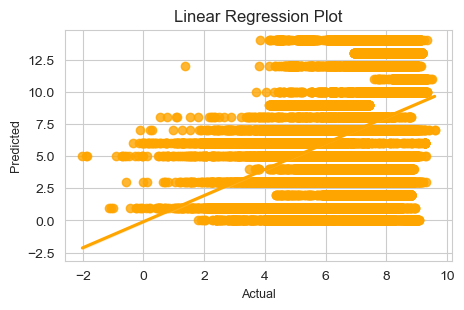

In [91]:
plt.figure(figsize=(5,3))
sns.regplot(x=ln_pred_test, y=y_test, color='orange')
plt.xlabel('Actual', fontsize=9)
plt.ylabel('Predicted', fontsize=9)
plt.title('Linear Regression Plot', fontsize=12)
plt.show()

In [92]:
# KNN model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,knn_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,knn_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,knn_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,knn_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,knn_pred_test)))

R2 Score on Train data :   85.36523030923033  %
R2 Score on test data :   77.779024557365  %
Mean Absolute Error :   0.8759769613804813
Mean Squared Error :   4.144437458408866
Root Mean Squared Error :   2.0357891488090964


In [93]:
# Random Forest Regressor model
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred_test=RF.predict(x_test)
RF_pred_train=RF.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,RF_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,RF_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,RF_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,RF_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,RF_pred_test)))

R2 Score on Train data :   96.85907825612436  %
R2 Score on test data :   83.18540778390955  %
Mean Absolute Error :   0.8118814832698366
Mean Squared Error :   3.136092112973947
Root Mean Squared Error :   1.7709014972532908


In [94]:
# Extra Trees Regressor model
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,et_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,et_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,et_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,et_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,et_pred_test)))

R2 Score on Train data :   99.16579847856633  %
R2 Score on test data :   84.84201587098573  %
Mean Absolute Error :   0.7131213533010683
Mean Squared Error :   2.827117890500868
Root Mean Squared Error :   1.6814035477840732


In [95]:
# Decision Tree Regressor model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,dt_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,dt_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,dt_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,dt_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,dt_pred_test)))

R2 Score on Train data :   99.16579847856633  %
R2 Score on test data :   70.09964233834638  %
Mean Absolute Error :   0.7619641825566749
Mean Squared Error :   5.576720186415234
Root Mean Squared Error :   2.3615080322571917


In [96]:
# Ridge model
Ri=Ridge()
Ri.fit(x_train,y_train)
Ri_pred_test=Ri.predict(x_test)
Ri_pred_train=Ri.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Ri_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Ri_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Ri_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Ri_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Ri_pred_test)))

R2 Score on Train data :   14.367153721354276  %
R2 Score on test data :   15.11130316824848  %
Mean Absolute Error :   3.3997642763788907
Mean Squared Error :   15.832603562038148
Root Mean Squared Error :   3.9790204274467036


In [97]:
# Gradient Boosting Regressor model
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,gb_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,gb_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,gb_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,gb_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,gb_pred_test)))

R2 Score on Train data :   39.94562528366025  %
R2 Score on test data :   40.6809173305677  %
Mean Absolute Error :   2.5685349742024766
Mean Squared Error :   11.063610994409832
Root Mean Squared Error :   3.3262006846265053


In [98]:
# SVR model
svr=SVR()
svr.fit(x_train,y_train)
svr_pred_test=svr.predict(x_test)
svr_pred_train=svr.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,svr_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,svr_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,svr_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,svr_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,svr_pred_test)))


R2 Score on Train data :   8.758377218859614  %
R2 Score on test data :   9.975708568414143  %
Mean Absolute Error :   3.1112262517990406
Mean Squared Error :   16.790444080142414
Root Mean Squared Error :   4.0976144377115835


### # Cross validation score

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [100]:
#Linear Regression Model
score1=cross_val_score(ln,X,y1,cv=kf,scoring='r2')
print('Score : ', score1)
print('Avg Score : ', score1.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,ln_pred_test) - score1.mean())*100, "%")

Score :  [0.1456458  0.14661581 0.14912579 0.14434771 0.14118907]
Avg Score :  14.538483919296322 %
Difference between CV score and R2 Score is  :  0.5728193701206113 %


In [101]:
# KNN Model
score2=cross_val_score(knn,X,y1,cv=kf,scoring='r2')
print('Score : ', score2)
print('Avg Score : ', score2.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,knn_pred_test) - score2.mean())*100, "%")

Score :  [0.77792162 0.77498904 0.77171513 0.76786001 0.77248678]
Avg Score :  77.29945141988439 %
Difference between CV score and R2 Score is  :  0.4795731374806156 %


In [102]:
# Random Forest Regressor model
score3=cross_val_score(RF,X,y1,cv=kf,scoring='r2')
print('Score : ', score3)
print('Avg Score : ', score3.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,RF_pred_test) - score3.mean())*100, "%")

Score :  [0.8315981  0.82995943 0.82927769 0.82332619 0.82942295]
Avg Score :  82.87168704452716 %
Difference between CV score and R2 Score is  :  0.31372073938239486 %


In [103]:
# Extra Trees Regressor model
score4=cross_val_score(et,X,y1,cv=kf,scoring='r2')
print('Score : ', score4)
print('Avg Score : ', score4.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,et_pred_test) - score4.mean())*100, "%")

Score :  [0.84847401 0.85059262 0.84783498 0.84376283 0.84561188]
Avg Score :  84.72552614214344 %
Difference between CV score and R2 Score is  :  0.11648972884229503 %


In [104]:
# Decision Tree Regressor model
score5=cross_val_score(dt,X,y1,cv=kf,scoring='r2')
print('Score : ', score5)
print('Avg Score : ', score5.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,dt_pred_test) - score5.mean())*100, "%")

Score :  [0.70555731 0.69151914 0.7029163  0.68049337 0.70627181]
Avg Score :  69.7351585554662 %
Difference between CV score and R2 Score is  :  0.36448378288018723 %


In [105]:
# Ridge model
score6=cross_val_score(Ri,X,y1,cv=kf,scoring='r2')
print('Score : ', score6)
print('Avg Score : ', score6.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,Ri_pred_test) - score6.mean())*100, "%")

Score :  [0.14564582 0.14661581 0.1491258  0.14434771 0.14118906]
Avg Score :  14.538483959525578 %
Difference between CV score and R2 Score is  :  0.5728192087229023 %


In [106]:
# Gradient Boosting Regressor model
score7=cross_val_score(gb,X,y1,cv=kf,scoring='r2')
print('Score : ', score7)
print('Avg Score : ', score7.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,gb_pred_test) - score7.mean())*100, "%")

Score :  [0.40098948 0.40539333 0.39770857 0.39727075 0.40085147]
Avg Score :  40.04427208396372 %
Difference between CV score and R2 Score is  :  0.636645246603984 %


In [ ]:
# SVR model
score8=cross_val_score(svr,X,y1,cv=kf,scoring='r2')
print('Score : ', score8)
print('Avg Score : ', score8.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,svr_pred_test) - score8.mean())*100, "%")

#### # So our best performing model with Target Column as ' capacity_mw ':
#### Extra Trees Regressor model  

R2 Score on Train data :   99.16  %  
R2 Score on test data :   84.84  %  
Mean Absolute Error :   0.71  
Mean Squared Error :   2.8  
Root Mean Squared Error :   1.68  
  
Avg Score :  84.72 %
Difference between CV score and R2 Score is  :  0.11 % 

#### # Hyper Parameter Tuning taking 'capacity_mw ' as target column

In [ ]:
params={'criterion' : ['mse','mae'],
       'max_features': ['auto', 'sqrt', 'log2'],
       'min_samples_split': [2, 5],
        'n_jobs' : [-2,-1,1]}

In [ ]:
gscv=GridSearchCV(et,params,cv=3)
gscv.fit(x_train,y_train)

In [ ]:
print('Best Parameters : ', gscv.best_params_,'\n')
print('=' * 100,'\n')
print('Best Score : ', gscv.best_score_ )

In [ ]:
best_model_capacity=ExtraTreesRegressor(criterion = 'mse', max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 30, n_jobs= -1)
best_model_Y1.fit(x_train,y_train)
y_pred=best_model_Y1.predict(x_test)
print('R2 Score on test data :  ',r2_score(y_test,y_pred)*100,' %')

### # Saving model

In [ ]:
import pickle
pickle.dump(best_model_Y1,open('Glogal_Power_Plant_project_Capacity','wb'))

In [ ]:
#load model
model_capacity=pickle.load(open('Glogal_Power_Plant_project_Capacity','rb'))

In [ ]:
prediction_capacity = model_capacity.predict(x_test)
prediction_capacity

In [ ]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction_capacity

df